##############################################
#  3ο Μέρος –  Ψηφιακή Επεξεργασία και Φασματική Ανάλυση Βιοσημάτων Κητωδών
##############################################

#### Οι Ασκήσεις πραγματοποιήθηκαν από τους : ΒΑΣΙΛΕΙAΔΗΣ ΔΗΜΉΤΡΙΟΣ AM: 03122111/el22111 - ΓΡΗΓΟΡΙΟΣ ΣΤΑΜΑΤΟΠΟΥΛΟΣ ΑΜ: 03122039/el22039.        Η Βιβλιογραφία μας αποτελείται από:
* Το documentation όλων των διαθέσιμων βιβλιοθηκών που αναφέρονται στο αρχείο "PYTHON GUIDE" στη διαδασκαλική ιστοσελίδα του Helios, 
* Όλα τα σετ διαφανειών που είναι ανεβασμένα στην παραπάνω ιστοσελίδα,
* Καθώς και πληροφορίες από δίαφορες άλλες όπως:


    *  https://dsp.stackexchange.com/ , 
    *  https://stackoverflow.com/search?q=jupyter+notebook , 
    *  https://ieeexplore.ieee.org/Xplore/home.jsp , 
    *  https://www.wikipedia.org/ , 
    *  https://arxiv.org/abs/2306.08436 , 
    *  https://sites.google.com/berkeley.edu/ee123-sp20/python , 
    *  https://github.com/openlists/DSPResources και άλλες ...

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  # Για αποθήκευση σε .wav
from IPython.display import Audio, display
import librosa         # για επιβεβαίωση συναρτήσεων fft κλπ.
import scipy.signal as sig
import IPython.display as ipd

### Άσκηση 3.1: Load και μετατροπή των αρχείων ήχων από σήματα Τάσης σε σήματα Πίεσης

In [28]:
sperm, sr_sperm = sf.read('dsp25_lab1_Data/85005006.wav')
humpback, sr_humpback = sf.read('dsp25_lab1_Data/9220100Q.wav')
ipd.Audio(sperm, rate=sr_sperm)
ipd.Audio(humpback, rate=sr_humpback)
print(sr_humpback, sr_sperm)

14900 81920


In [29]:
GF = 0.16 #Gain factor
sensitivity = -155 #dB relative to 1V/μPa

def sig_to_pressure(signal):
    pressure = (1.5 * signal * GF)/(10**(sensitivity/20))  # Δημιουργούμε συνάρτηση γα να την αξιοποιήσουμε και αργότερα
    return pressure

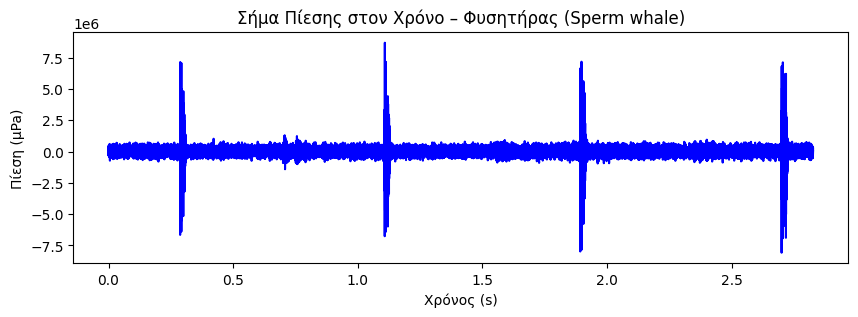

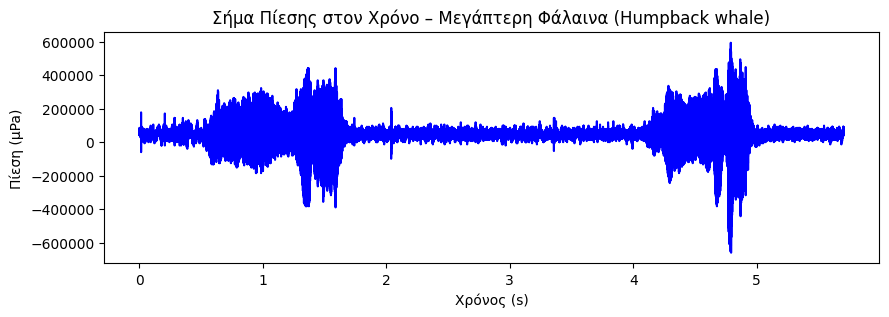

In [30]:
sperm_pressure = sig_to_pressure(sperm)
humpback_pressure = sig_to_pressure(humpback)
pressure_sperm_uPa = sperm_pressure
pressure_hump_uPa = humpback_pressure
#plots
t_sperm = np.linspace(0, len(pressure_sperm_uPa)/sr_sperm, len(pressure_sperm_uPa))
t_hump = np.linspace(0, len(pressure_hump_uPa)/sr_humpback, len(pressure_hump_uPa))


# Plots για την παρουσίαση γραφικών παραστάσεων Πίεσης-Χρόνου

plt.figure(figsize=(10,3))
plt.plot(t_sperm, pressure_sperm_uPa, color='b')
plt.title("Σήμα Πίεσης στον Χρόνο – Φυσητήρας (Sperm whale)")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa)")
plt.show()

plt.figure(figsize=(10,3))
plt.plot(t_hump, pressure_hump_uPa, color='b')
plt.title("Σήμα Πίεσης στον Χρόνο – Μεγάπτερη Φάλαινα (Humpback whale)")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa)")
plt.show()

Πόροι:  
* https://whoicf2.whoi.edu/science/B/whalesounds/index.cfm
* Φυσητήρας: https://www.discoverwildlife.com/animal-facts/marine-animals/sperm-whale-facts
* Μεγάπτερη φάλαινα https://en.wikipedia.org/wiki/Humpback_whale



### 3.2: Υπολογισμός Μέσης Τετραγωνικής Ρίζας και Επιπέδου Ηχητικής Πίεσης

In [31]:
#SPL σε dB relative to 1μPa

def rms(pressure):
    sig_mean = np.mean(pressure**2)  # Δημιουργούμε συναρτήσεις που θα χρειαστούμε στη συνέχεια
    rms = np.sqrt(sig_mean)
    return rms
def spl(rms):
    spl = 20 *np.log10(rms/1.0)
    return spl

rms_sperm = rms(sperm_pressure)
rms_humpback = rms(humpback_pressure)

spl_sperm = spl(rms_sperm)
spl_hump = spl(rms_humpback)

print(f"p_rms (Sperm whale) = {rms_sperm:.2f} μPa, SPL = {spl_sperm:.2f} dB re 1μPa")
print(f"p_rms (Humpback whale) = {rms_humpback:.2f} μPa, SPL = {spl_hump:.2f} dB re 1μPa")


p_rms (Sperm whale) = 336416.20 μPa, SPL = 110.54 dB re 1μPa
p_rms (Humpback whale) = 83914.96 μPa, SPL = 98.48 dB re 1μPa


### Άσκηση 3.3: Εφαρμογή Θεωρήματος Parseval για έλεγχο των τιμών που βρήκαμε

In [32]:
#Γινεται δοκιμη για το σημα της φαλαινας φυσητήρα
#Θεώρημα Parseval: James H. McClellan, Ronald W. Schafer, and Mark A. Yoder, DSP First (2nd Edition), Prentice-Hall, Inc., USA, 2007.

p = sperm_pressure
P_k = np.fft.fft(sperm_pressure)
p_fft = np.mean((np.abs(P_k))**2)
p_kanoniko = np.sum((np.abs(p))**2)

print(p_fft/10e10)
print(p_kanoniko/10e10)


262060.96422657368
262060.96422657368


ΕΠΟΜΕΝΩΣ ΤΑ ΔΥΟ ΑΠΟΤΕΛΕΣΜΑΤΑ ΒΓΑΙΝΟΥΝ ΙΣΑ ΚΑΙ ΕΠΙΒΕΒΑΙΩΝΕΤΑΙ ΤΟ ΘΕΩΡΗΜΑ ΤΟΥ PERSEVAL


### Άσκηση 3.4: Υψηπερατό Φίλτρο Buterworth

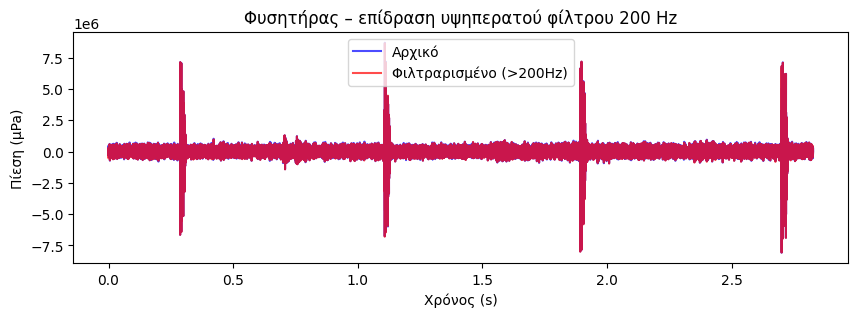

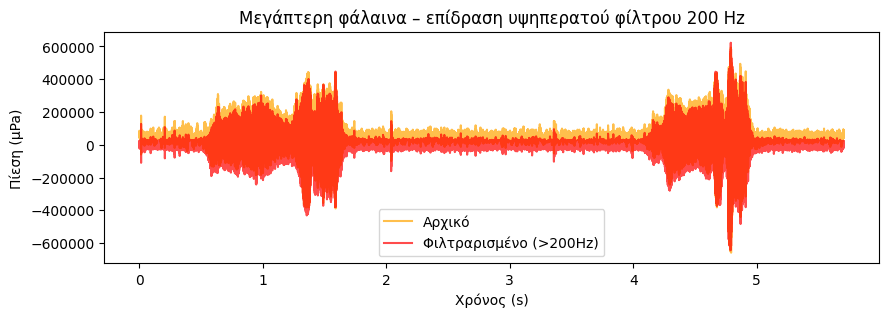

In [33]:
#3.4 Δημιουργία ButterWorth φίλτρου για απομόνωση f>= 200 Hz
from scipy.signal import butter, filtfilt, lfilter

# Σχεδιασμός υψηπερατού φίλτρου Butterworth 3ης τάξης με cutoff 200 Hz
cutoff = 200  # Hz
b1, a1 = butter(N=3, Wn=cutoff/(sr_sperm/2), btype='high')  # highpass φίλτρο
b2, a2 = butter(N=3, Wn=cutoff/(sr_humpback/2), btype='high')  # highpass φίλτρο

# Εφαρμογή φίλτρου στα σήματα πίεσης των φαλαινών
pressure_sperm_filtered = filtfilt(b1, a1, pressure_sperm_uPa)
pressure_hump_filtered = filtfilt(b2, a2, pressure_hump_uPa)

# Σχεδίαση συγκριτικών κυματομορφών πριν και μετά το φίλτρο
t = np.linspace(0, len(pressure_sperm_uPa)/sr_sperm, len(pressure_sperm_uPa))
plt.figure(figsize=(10,3))
plt.plot(t, pressure_sperm_uPa, label='Αρχικό', alpha=0.7, color = 'blue')
plt.plot(t, pressure_sperm_filtered, label='Φιλτραρισμένο (>200Hz)', alpha=0.7, color='red')

plt.title("Φυσητήρας – επίδραση υψηπερατού φίλτρου 200 Hz")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa)")
plt.legend()
plt.show()

t = np.linspace(0, len(pressure_hump_uPa)/sr_humpback, len(pressure_hump_uPa))
plt.figure(figsize=(10,3))
plt.plot(t, pressure_hump_uPa, label='Αρχικό', alpha=0.7, color='orange')
plt.plot(t, pressure_hump_filtered, label='Φιλτραρισμένο (>200Hz)', alpha=0.7, color='red')
plt.title("Μεγάπτερη φάλαινα – επίδραση υψηπερατού φίλτρου 200 Hz")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa)")
plt.legend()
plt.show()



Στα διαγράμματα, η κόκκινη καμπύλη (φιλτραρισμένο) ακολουθεί τη μπλε/ πορτοκαλί (αρχική) για το κυρίως μέρος του σήματος, με αισθητή διαφορά μόνο εκεί όπου το αρχικό είχε αργές μεταβολές (π.χ. DC offset ή πολύ αργές ταλαντώσεις).

### Άσκηση 3.5: Επιρροή κρούσης πασάλων στην ακοή των δύο ειδών φαλαινών

In [34]:
#3.5 Pile Driving ελεγχος για επιρροη συμπεριφορας

pile_sig , sr_sig = sf.read('dsp25_lab1_Data/Pile driving.wav') # National Oceanic and Atmospheric Administration, Passive Acoustics group. stf 
                                                                # Multisound NOAA PAGroup 01,” 2021.
sensitivity = -125
pile_pressure = sig_to_pressure(pile_sig)

#Θα δοκιμάσουμε αρχικά για τους φυσητήρες που δεν χρειάζεται το φίλτρο καθώς ακουν σε όλο το φάσμα
pile_rms = rms(pile_pressure)
pile_spl = spl(pile_rms)
print(f"p_rms (pile driving) = {pile_rms:.2f} μPa, SPL = {pile_spl:.2f} dB re 1μPa")

#Θα κάνουμε για τις μεγάπτερες με φίλτρο butter
cutoff1 = 300  # Hz
cutoff2 = 3000 # Hz
b, a = butter(N=3, Wn=[cutoff1/(sr_sig/2), cutoff2/(sr_sig/2)], btype='bandpass')  # Bandpass φίλτρο
pressure_pile_filtered = filtfilt(b, a, pile_pressure)

#RMS SPL
pile_filtered_rms = rms(pressure_pile_filtered)
pile_filtered_spl = spl(pile_filtered_rms)

print(f"p_rms filtered (pile driving) = {pile_filtered_rms:.2f} μPa, SPL = {pile_filtered_spl:.2f} dB re 1μPa")



p_rms (pile driving) = 245303.66 μPa, SPL = 107.79 dB re 1μPa
p_rms filtered (pile driving) = 15610.45 μPa, SPL = 83.87 dB re 1μPa


p_rms (pile driving) = 245303.66 μPa, SPL = 107.79 dB re 1μPa και                                                                                                
p_rms filtered (pile driving) = 15610.45 μPa, SPL = 83.87 dB re 1μPa


In [35]:
# Επομένως οι μεγάπτερες δεν επηρεάζονται, καθώς στο φάσμα 300 με 3000 Ηz το επίπεδο ηχητικής πίεσης δεν ξεπερνάει τα 100dB και άρα
# μόνο οι φυσητήρες, οι οποίοι ακούν όλο το φάσμα επηρεάζονται

### Άσκηση 3.6: Υπολογισμός και παρουσιάση Ενέργειας Βραγχέος Χρόνου

In [36]:
#3.6 Short-time energy calculation
def short_time_energy(signal, window_length_samples):
    window = np.hamming(window_length_samples)
    squared_signal = signal ** 2
    ste = np.convolve(squared_signal, window, mode='same')  # Align with input signal
    return ste

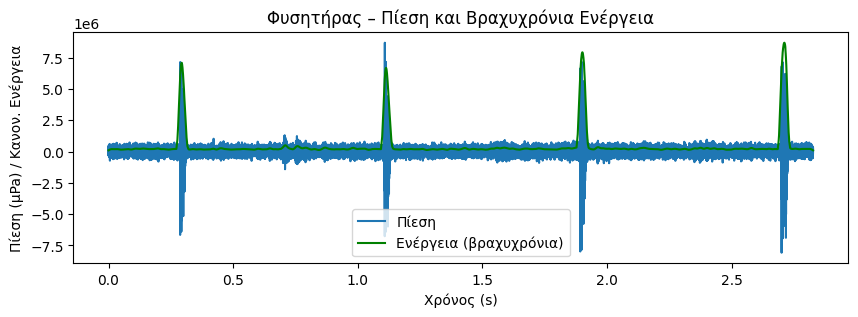

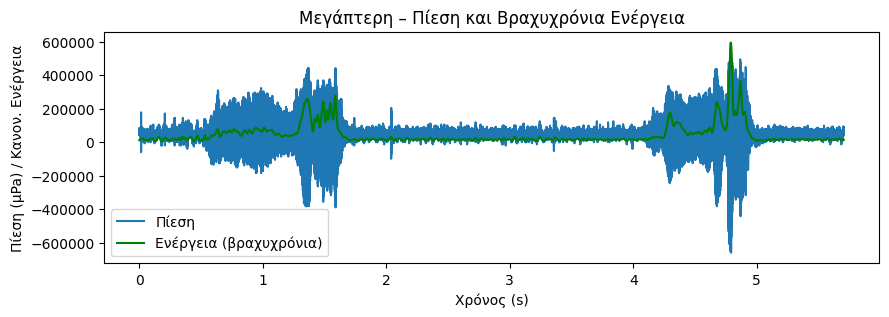

In [37]:
window_dur = 0.03
frame_sperm = int(window_dur * sr_sperm)
frame_hump = int(window_dur * sr_humpback)
ste_sperm = short_time_energy(pressure_sperm_uPa, frame_sperm)
ste_hump = short_time_energy(pressure_hump_uPa, frame_hump)


plt.figure(figsize=(10,3))
plt.plot(t_sperm, pressure_sperm_uPa, label="Πίεση")
plt.plot(t_sperm, ste_sperm * np.max(pressure_sperm_uPa) / np.max(ste_sperm), label="Ενέργεια (βραχυχρόνια)", color='g') #Κανονικοποίηση στην μορφή της πίεσης
plt.title("Φυσητήρας – Πίεση και Βραχυχρόνια Ενέργεια")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa) / Κανον. Ενέργεια")
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(t_hump, pressure_hump_uPa, label="Πίεση")
plt.plot(t_hump, ste_hump * np.max(pressure_hump_uPa) / np.max(ste_hump), label="Ενέργεια (βραχυχρόνια)", color='g')
plt.title("Μεγάπτερη – Πίεση και Βραχυχρόνια Ενέργεια")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Πίεση (μPa) / Κανον. Ενέργεια")
plt.legend()
plt.show()

In [38]:
# Για τον φυσητήρα, η βραχυχρόνια ενέργεια παρουσιάζει απότομες κορυφές στα σημεία όπου υπάρχουν clicks,
# και θα είναι σχεδόν μηδενική (πολύ χαμηλή) στα ενδιάμεσα διαστήματα σιωπής. Αυτό διευκολύνει τον εντοπισμό των clicks.
# Για τη μεγάπτερη φάλαινα, το τραγούδι της έχει μια πιο συνεχόμενη παρουσία ήχου. Η βραχυχρόνια ενέργεια ακολουθεί
# τις δυναμικές του τραγουδιού – όπου το τραγούδι είναι πιο έντονο (π.χ. σε κορύφωση ενός φωνήματος) θα έχει υψηλότερη ενέργεια, 
# ενώ μπορεί να πέφτει σε στιγμές “παύσης” ή μετάβασης.

### Άσκηση 3.7 Ενέργεια Teager-Kaiser

In [39]:
# 3.7 Teager-Kaiser Energy (για διακριτό σήμα)
# Πληροφορίες από Petros Maragos, James F Kaiser, and Thomas F Quatieri, 
# “Energy separation in signal modulations with application to speech analysis,” 
# IEEE Transactions on Signal Processing, vol. 41, pp. 3024–3051, 1993
# http://cvsp.cs.ntua.gr/interspeech2018.shtm

def teager_operator(x):
    N = len(x)
    psi = np.zeros(N)
    for n in range(1, N-1):
        psi[n] = x[n]**2 - x[n-1] * x[n+1]
    return psi

In [40]:
teager_sperm = teager_operator(pressure_sperm_uPa)
teager_hump = teager_operator(pressure_hump_uPa)

In [41]:
# Κανονικοποίηση για σχεδιασμό (0-1)
teager_sperm_norm = teager_sperm / np.max(np.abs(teager_sperm))
teager_hump_norm = teager_hump / np.max(np.abs(teager_hump))

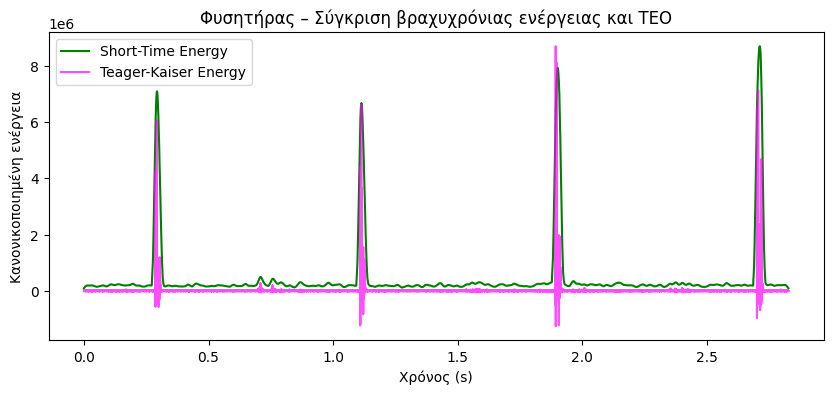

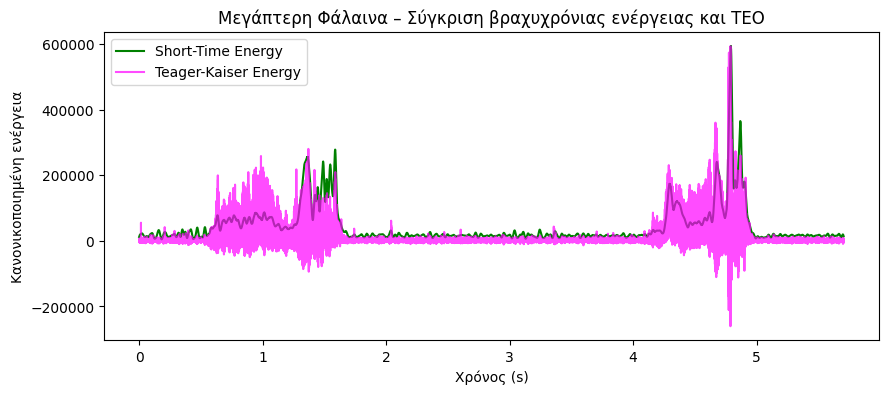

In [42]:
# Σύγκριση Short-Time Energy και TEO για φυσητήρα
plt.figure(figsize=(10,4))
plt.plot(t_sperm, ste_sperm * np.max(pressure_sperm_uPa) / np.max(ste_sperm), label="Short-Time Energy", color='green')
plt.plot(t_sperm, teager_sperm_norm*np.max(pressure_sperm_uPa), label="Teager-Kaiser Energy", color='magenta', alpha=0.7)
plt.title("Φυσητήρας – Σύγκριση βραχυχρόνιας ενέργειας και TEO")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Κανονικοποιημένη ενέργεια")
plt.legend()
plt.show()

# Σύγκριση Short-Time Energy και TEO για μεγάπτερη φάλαινα
plt.figure(figsize=(10,4))
plt.plot(t_hump, ste_hump * np.max(pressure_hump_uPa) / np.max(ste_hump), label="Short-Time Energy", color='green')
plt.plot(t_hump, teager_hump_norm * np.max(pressure_hump_uPa), label="Teager-Kaiser Energy", color='magenta', alpha=0.7)
plt.title("Μεγάπτερη Φάλαινα – Σύγκριση βραχυχρόνιας ενέργειας και TEO")
plt.xlabel("Χρόνος (s)")
plt.ylabel("Κανονικοποιημένη ενέργεια")
plt.legend()
plt.show()

Παρατηρήσεις:
* Ο TEO για τον φυσητήρα πιθανώς θα δίνει επίσης αιχμές στα clicks, ενδεχομένως με ακόμα πιο απότομη κορύφωση και λιγότερη “ουρά” συγκριτικά με την απλή βραχυχρόνια ενέργεια. Αυτό σημαίνει ότι μπορεί να τονίζει περισσότερο τα στιγμιαία γεγονότα (τα clicks) και να αγνοεί καλύτερα το υπόβαθρο. Για τη μεγάπτερη φάλαινα, που το σήμα της είναι πιο ημιομαλό, ο TEO μπορεί να αναδείξει συγκεκριμένες μεταβολές στο σήμα (π.χ. αρχές ή τέλη φωνημάτων) πιο έντονα από την απλή ενέργεια.

### Άσκηση 3.8: Σχεδίαση περιοδόγραμματος του Welch σε λογαριθμική κλίμακα

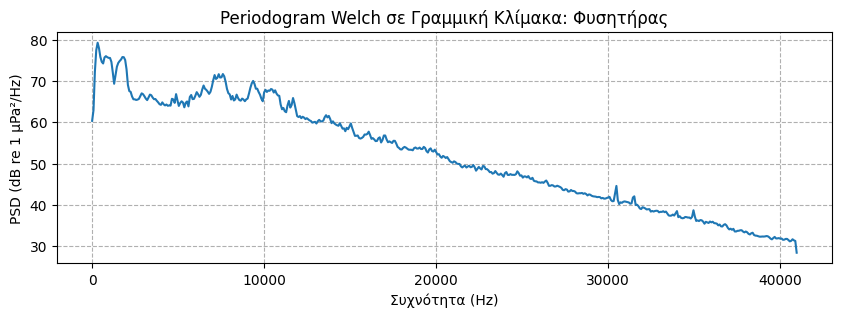

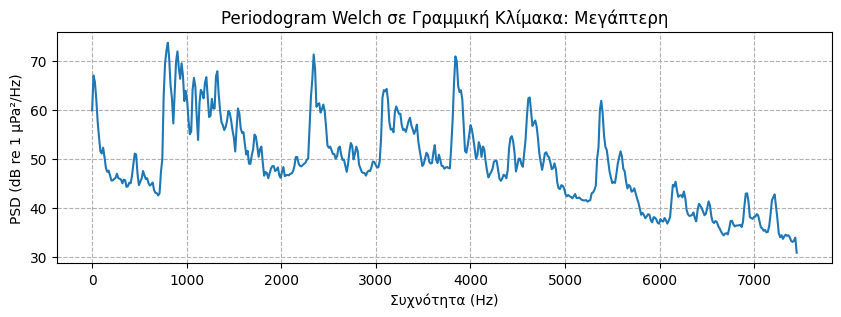

In [43]:
# Υπολογίζουμε το Welch Periodogram, υπολογίζουμε τις φασματικές πυκνότητες ισχύος σε dB
from scipy.signal import welch
# Welch: Oppenheim A. Schafer R., Discrete Signal Processing, Prentice Hall Signal Processing Series, 1999
f_sperm, Pxx1 = welch(pressure_sperm_uPa, fs = sr_sperm, nperseg = 1024)
f_humpback , Pxx2 = welch(pressure_hump_uPa, fs = sr_humpback, nperseg = 1024)
Pxx1_dB = 10 * np.log10(Pxx1) # dB relative to 1 μPa²/Hz
Pxx2_dB = 10 * np.log10(Pxx2) # dB relative to 1 μPa²/Hz

# Σχεδιάζουμε σε λογαριθμική κλίμακα, μια φορά για τον "φυσητήρα" και μία φορά για την "μεγάπτερη"

plt.figure(figsize=(10, 3))
plt.plot(f_sperm, Pxx1_dB)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('PSD (dB re 1 μPa²/Hz)')
plt.title('Periodogram Welch σε Γραμμική Κλίμακα: Φυσητήρας')
plt.grid(True, which="both", ls="--")
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(f_humpback, Pxx2_dB)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('PSD (dB re 1 μPa²/Hz)')
plt.title('Periodogram Welch σε Γραμμική Κλίμακα: Μεγάπτερη')
plt.grid(True, which="both", ls="--")
plt.show()

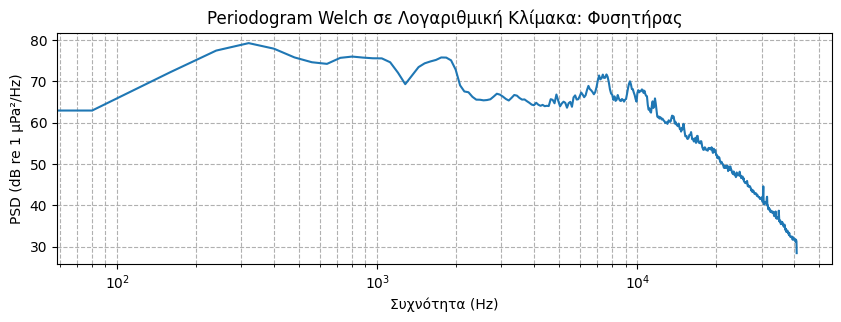

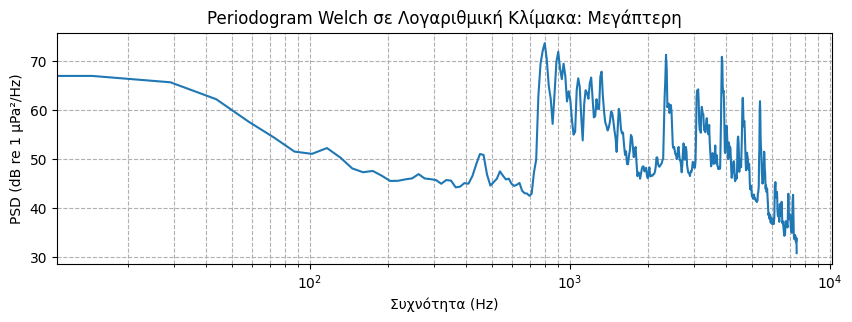

In [44]:
# Υπολογίζουμε το Welch Periodogram, υπολογίζουμε τις φασματικές πυκνότητες ισχύος σε dB
from scipy.signal import welch
# Welch: Oppenheim A. Schafer R., Discrete Signal Processing, Prentice Hall Signal Processing Series, 1999
f_sperm, Pxx1 = welch(pressure_sperm_uPa, fs = sr_sperm, nperseg = 1024)
f_humpback , Pxx2 = welch(pressure_hump_uPa, fs = sr_humpback, nperseg = 1024)
Pxx1_dB = 10 * np.log10(Pxx1) # dB relative to 1 μPa²/Hz
Pxx2_dB = 10 * np.log10(Pxx2) # dB relative to 1 μPa²/Hz

# Σχεδιάζουμε σε λογαριθμική κλίμακα, μια φορά για τον "φυσητήρα" και μία φορά για την "μεγάπτερη"

plt.figure(figsize=(10, 3))
plt.semilogx(f_sperm, Pxx1_dB)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('PSD (dB re 1 μPa²/Hz)')
plt.title('Periodogram Welch σε Λογαριθμική Κλίμακα: Φυσητήρας')
plt.grid(True, which="both", ls="--")
plt.show()

plt.figure(figsize=(10, 3))
plt.semilogx(f_humpback, Pxx2_dB)
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('PSD (dB re 1 μPa²/Hz)')
plt.title('Periodogram Welch σε Λογαριθμική Κλίμακα: Μεγάπτερη')
plt.grid(True, which="both", ls="--")
plt.show()

### Παρατηρήσεις:
* Γενικά, η φασματική πυκνότητα ισχύος (PSD) δείχνει πώς κατανέμεται η ισχύς ενός σήματος ως προς τη συχνότητα. Είναι χρήσιμη για να αναγνωρίσουμε τα φάσματα των σημάτων μας. Την υπολογίσαμε με τη μέθοδο Welch, η οποία ουσιαστικά υπολογίζει το μέσο όρο του periodogram σε τμήματα του σήματος για να δώσει ένα πιο ομαλό φάσμα.
* Δοκιμάσαμε να φτιάξουμε διαγράμματα με γραμμική και λογαριθμική κλίμακα συχνότητας, και καταλήξαμε πως η γραμμική μας προσφέρει περισσότερες παρατηρήσεις για να αναλύσουμε.
* Φυσητήρας: Βλέπουμε υψηλή ενέργεια μέχρι το 1kHz, καθώς τα clicks έχουν ευρύ φάσμα που επεκτείνεται από εκατοντάδες Hz έως και πολλαπλά kHz (ακόμα και δεκάδες kHz), ενώ στη συνέχεια σταδιακά μειώνεται μέχρι να σβήσει.
* Μεγάπτερη φάλαινα: Το ηχητικό της σήμα έχει ισχυρά στοιχεία στις συχνότητες 1000Hz με 8kHz, με αρμονικές. Το PSD δείχνει διάφορες κορυφές αρμονικών, στα σημεία πχ 900Hz, 2400Hz, 3000Hz κλπ, και γενικά όσο αυξάνεται η συχνότητα φθίνει η ενέργεια.

### 3.9 φασματογράφημα (spectrogram) των δύο βιοσημάτων

In [45]:
def compute_spectrogram(signal, fs, frame_duration, n_fft, hop_fraction=0.5):
    frame_len = int(frame_duration * fs)
    hop_len = int(frame_len * hop_fraction)
    window = np.hamming(frame_len)
    # Υπολογισμός STFT (complex array)
    # Η παράμετρος center=True στην κλήση της librosa.stft εξασφαλίζει ότι το σήμα πακεταρίζεται 
    # με μηδενικά ώστε το παράθυρο να κεντραριστεί γύρω από κάθε σημείο
    stft_matrix = librosa.stft(signal, n_fft=n_fft, hop_length=hop_len, win_length=frame_len, window='hamming', center=True) 
    # Μέτρο (απόλυτο) και μετατροπή σε dB
    spectrogram = np.abs(stft_matrix+0.0001)**2
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    return spectrogram_db, frame_len, hop_len

In [46]:
#Φασματογραφία Φυσητήρα
spectrogram_sperm_db, frame_sperm, hop_sperm = compute_spectrogram(pressure_sperm_uPa, sr_sperm, 0.02, 2048)

#Φασματογραφία Μεγάπτερης
spectrogram_hump_db, fram_hump, hop_hump = compute_spectrogram(pressure_hump_uPa, sr_humpback, 0.02, 2048)


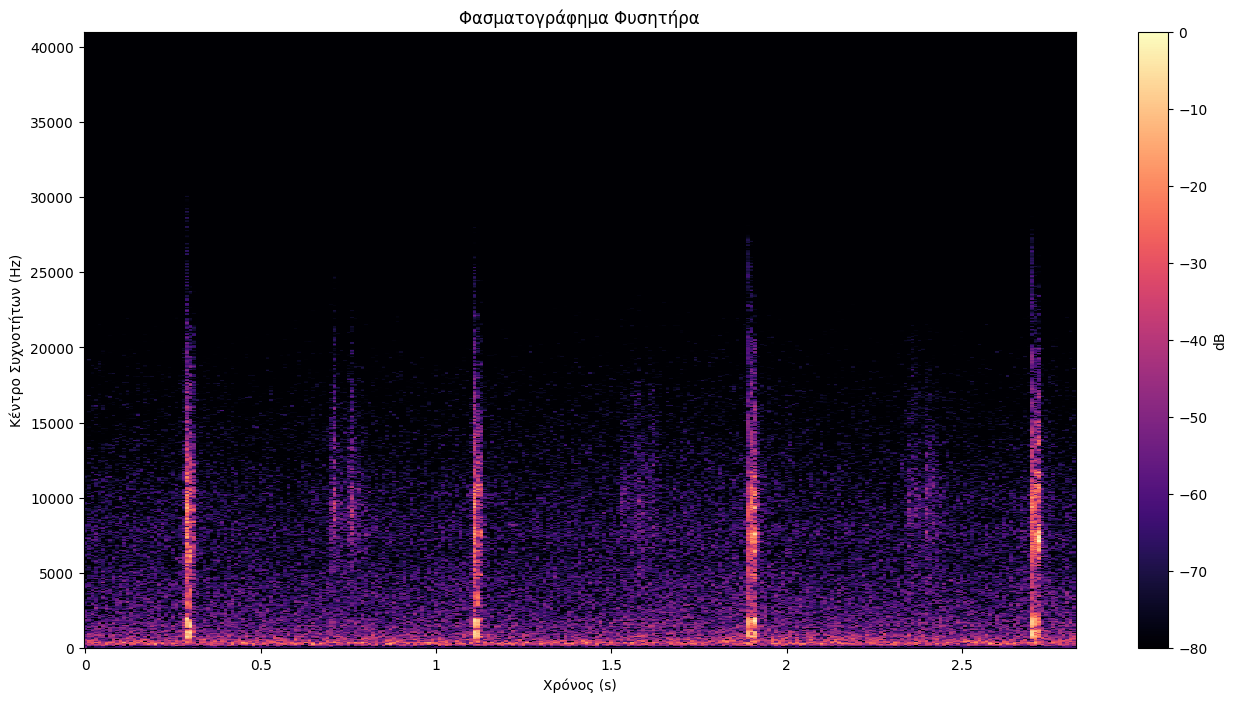

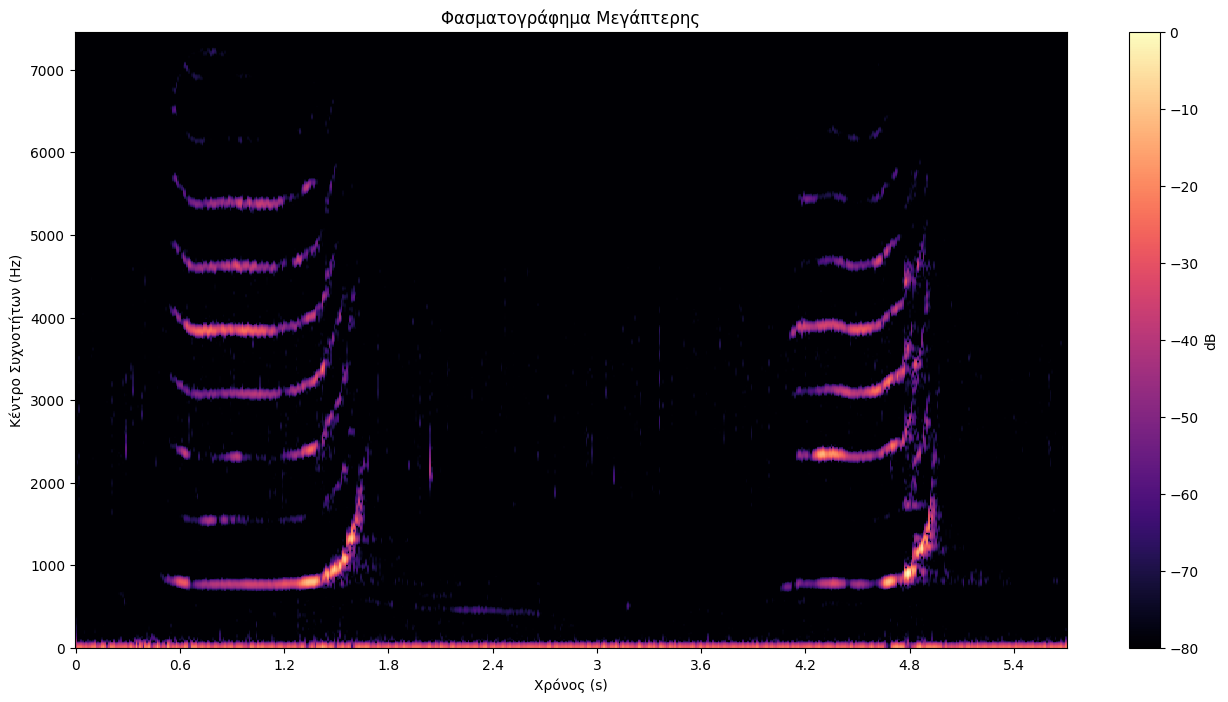

In [47]:
plt.figure(figsize=(16, 8))
plt.title("Φασματογράφημα Φυσητήρα")
librosa.display.specshow(spectrogram_sperm_db, sr=sr_sperm, hop_length=hop_sperm, x_axis='time', y_axis='hz')
plt.colorbar(label ='dB')
plt.xlabel("Χρόνος (s)")
plt.ylabel("Κέντρο Συχνοτήτων (Hz)")
plt.show()

plt.figure(figsize=(16, 8))
plt.title("Φασματογράφημα Μεγάπτερης")
librosa.display.specshow(spectrogram_hump_db, sr=sr_humpback, hop_length=hop_hump, x_axis='time', y_axis='hz')
plt.colorbar(label ='dB')
plt.xlabel("Χρόνος (s)")
plt.ylabel("Κέντρο Συχνοτήτων (Hz)")
plt.show()

#### Παρατηρήσεις:
* Το φασματογράφημα ενός σήματος δείχνει πώς το φάσμα μεταβάλλεται με τον χρόνο. Είναι ουσιαστικά ένας χάρτης χρόνου-συχνότητας : στον ένα άξονα ο χρόνος, στον άλλο η συχνότητα, και με χρωματική κλίμακα η ένταση (σε dB)
* Φυσητήρας: Βλέπουμε τα clicks ως κατακόρυφες “λωρίδες” ενέργειας που καλύπτουν ευρύ φάσμα (από χαμηλά έως αρκετά υψηλά Hz). Μεταξύ τους υπάρχει ησυχία, καθώς και από το ηχητικό δεν ακούμε άλλο ήχο παρά μερικό background effect. Ακόμη, αυτές οι λωρίδες ενέργειας κρατάνε πολύ λίγο χρόνο.
* Μεγάπτερη φάλαινα: Βλέπουμε έναν πιο συνεχή και αρμονικό σχηματισμό. Βλέπουμε για κάθε γεγονός που ακούγεται η φάλαινα πολλές παράλληλες φωτεινές γραμμές στο ίδιο χρονικό διάστημα, οι οποίες είναι σταθερές και διαρκούν αρκετά. Αυτές αποτελούν τις αρμονικές του τραγουδιού της φάλαινας.

Βιβλιογραφία: Vincent Lostanlen, Justin Salamon, Mark Cartwright, Brian McFee, Andrew Farnsworth,
Steve Kelling, and Juan Pablo Bello, “Per-channel energy normalization: Why and how,”
IEEE Signal Processing Letters, vol. 26, no. 1, pp. 39–43, 2019.


### 3.10: Εφαρμογή της μεθόδου PCEN

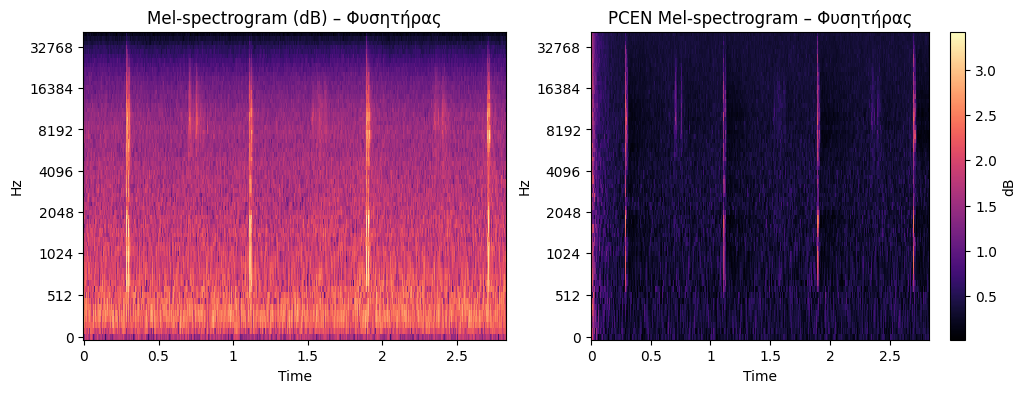

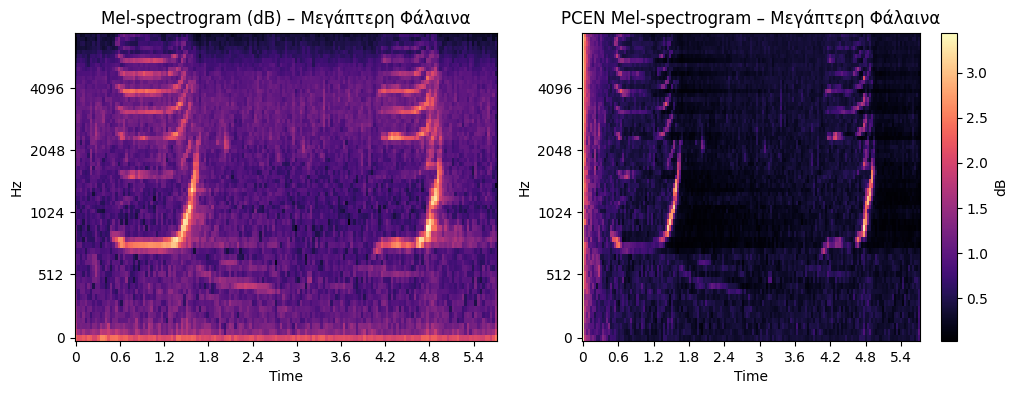

In [48]:
# Mel-spectrogram (θα χρησιμοποιήσουμε power=1 για ενέργεια, όχι power=2 για ισχυ)
n_mels = 64
mel_spec_sperm = librosa.feature.melspectrogram(y=pressure_sperm_uPa.astype(float), sr=sr_sperm, n_fft=1024, hop_length=512, n_mels=n_mels, power=1.0)
mel_spec_hump = librosa.feature.melspectrogram(y=pressure_hump_uPa.astype(float), sr=sr_humpback, n_fft=1024, hop_length=512, n_mels=n_mels, power=1.0)

# Μετατροπή mel-spectrogram σε dB (για σύγκριση)
mel_spec_sperm_db = librosa.amplitude_to_db(mel_spec_sperm, ref=np.max)
mel_spec_hump_db = librosa.amplitude_to_db(mel_spec_hump, ref=np.max)

# Εφαρμογή PCEN (σημείωση: η librosa.pcen προτείνεται να δοθεί S * (2**31) αν S είναι σε [-1,1] αρχικά για απόλυτη κλίμακα)
pcen_sperm = librosa.pcen(mel_spec_sperm )
pcen_hump = librosa.pcen(mel_spec_hump )

# Θα πάρουμε log10 για οπτικοποίηση (ή amplitude_to_db):
pcen_sperm_db = librosa.amplitude_to_db(pcen_sperm, ref=np.max)
pcen_hump_db = librosa.amplitude_to_db(pcen_hump, ref=np.max)

# Σχεδίαση mel-spectrogram vs PCEN για φυσητήρα
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(mel_spec_sperm_db, sr=sr_sperm, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.title("Mel-spectrogram (dB) – Φυσητήρας")
plt.subplot(1,2,2)
librosa.display.specshow(pcen_sperm, sr=sr_sperm, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.title("PCEN Mel-spectrogram – Φυσητήρας")
plt.colorbar(label ='dB')
plt.show()

# Σχεδίαση mel-spectrogram vs PCEN για μεγάπτερη φάλαινα
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
librosa.display.specshow(mel_spec_hump_db, sr=sr_humpback, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.title("Mel-spectrogram (dB) – Μεγάπτερη Φάλαινα")
plt.subplot(1,2,2)
librosa.display.specshow(pcen_hump, sr=sr_humpback, hop_length=512, x_axis='time', y_axis='mel', cmap='magma')
plt.title("PCEN Mel-spectrogram – Μεγάπτερη Φάλαινα")
plt.colorbar(label ='dB')
plt.show()


### Συμπεράσματα - Παρατηρήσεις:
* Mel-spectrogram: Είναι φασματογράφημα όπου ο άξονας συχνότητας έχει μετασχηματιστεί σε mel κλίμακα (μια κλίμακα που προσεγγίζει τον τρόπο που ακούει τις συχνότητες ο άνθρωπος – με υψηλότερη ανάλυση σε χαμηλές συχνότητες και χαμηλότερη σε υψηλές). Εμείς μειώσαμε και τον αριθμό των συχνοτικών καναλιών (64 mel bins).
* PCEN: Είναι μια τεχνική ομαλοποίησης που βελτιώνει την αντίθεση ανάμεσα σε ήχους που χρειαζόμαστε (ενδιαφέροντος), π.χ. τα clicks ή τα φωνήματα φαλαινών και τον “background” θόρυβο.

* Το φασματογράφημα χωρίς τη μέθοδο pcen εμφανίζει το πραγματικό περιεχόμενο
του σήματος με τον όποιο θόρυβο κλπ αυτό περιέχει. Παρατηρούμε, λοιπόν ότι
εμφανίζει ποικίλες διακυμάνσεις στην ένταση λόγω των διαφορετικών επιπέδων
σήματος και θορύβου. Ωστόσο τα βασικά χαρακτηριστικά είναι ασαφή και δεν
αναδεικνύονται.  

* Παρατηρώντας τα mel-φασματογραφήματα πριν και μετά την εφαρμογή της
μεθόδου pcen, παρατηρούμε ότι με τη pcen ενισχύεται η αντίθεση των
χαρακτηριστικών του φασματογραφήματος, καθιστώντας έτσι πιο εμφανή. Αυτό
συμβαίνει διότι μειώνει την επίδραση του background noise. Τέλος στο pcen
εμφανίζεται κανονικοποιημένη και ομαδικοποιημένη η ενέργεια κατά μήκος των συχνοτήτων